In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lib.simulator as sim
import pickle

import lib.draw as draw

In [22]:
df_unif = pd.read_csv('tmp/debug_data_from_ce_uniformstart.csv')
df_tri = pd.read_csv('tmp/debug_data_from_ce_traingularstart.csv')

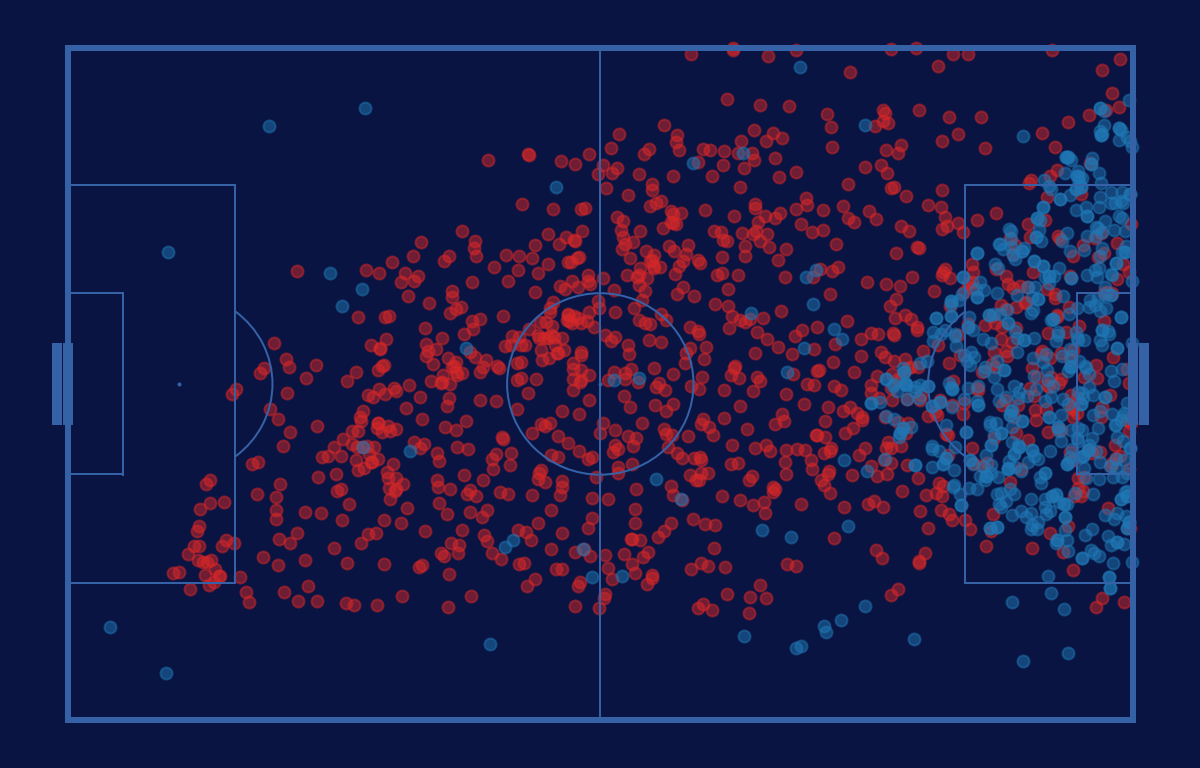

In [23]:
draw.pitch()
plt.scatter(df_tri.x*100, df_tri.y*100, color = 'C3', alpha = 0.5)
plt.scatter(df_unif.x*100, df_unif.y*100, color = 'C0', alpha = 0.5)
plt.savefig('img/paper imgs/dist_ce_selection.png', format='png')

In [24]:
f = open('tmp/results_ce.txt', 'r')
results_ce = f.readlines()
results_ce = [float(res.split('det_rewards=')[1]) for res in results_ce]
df_ddpgres = pd.read_csv('tmp/logddpg_data.csv')

plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 900
plt.rcParams['figure.figsize'] = (10,4)

plt.subplot(2,1,1)
plt.title('Training performance over iterations', fontweight='bold')
plt.plot(results_ce)
plt.plot(pd.Series(results_ce).rolling(5).mean())
plt.ylabel('Cross Entropy', fontweight='bold')
plt.subplot(2,1,2)
plt.plot(df_ddpgres['1'], label = 'Reward')
plt.plot(df_ddpgres['1'].rolling(5).mean(), label = 'Moving average (5) of Reward')
plt.legend(loc='upper right', prop={'size': 8})
plt.ylabel('DDPG', fontweight='bold')
plt.xlabel('Iteration', fontweight='bold')

plt.savefig('img/paper imgs/training_evo.png', format='png')
plt.savefig('img/paper imgs/training_evo.eps', format='eps');